In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_context("talk")

plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

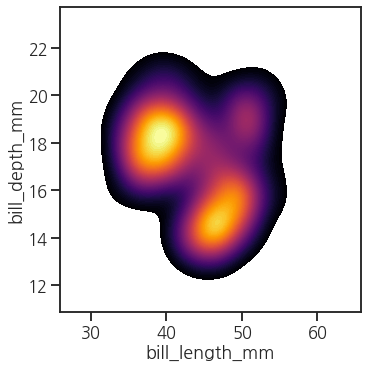

In [3]:
df_peng = sns.load_dataset("penguins")

fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
sns.kdeplot(x="bill_length_mm", y="bill_depth_mm", data=df_peng, ax=ax,
            fill=True, levels=100, cmap="inferno")

fig.savefig("108_mpl3d3_01.png")

xmin, xmax = 25.91, 65.79
ymin, ymax = 10.86, 23.74


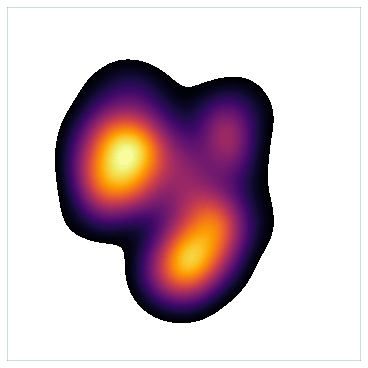

In [55]:
# x, y 범위 반올림 재설정
xmin, xmax = np.round(ax.get_xlim(),2)
ymin, ymax = np.round(ax.get_ylim(),2)
print(f"xmin, xmax = {xmin}, {xmax}")
print(f"ymin, ymax = {ymin}, {ymax}")
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# 윤곽선 눈금
ax.axvline(xmin, lw=0.01, c="green")
ax.axvline(xmax, lw=0.01, c="green")
ax.axhline(ymin, lw=0.01, c="green")
ax.axhline(ymax, lw=0.01, c="green")
ax.axis(False)

fig.savefig("KDE_peng.png")
display(fig)

In [56]:
im_pengkde = plt.imread("KDE_peng.png")
print(im_pengkde.shape)
print(im_pengkde[:5, :5])

(360, 360, 4)
[[[1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]

 [[1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]

 [[1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]

 [[1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [0.6313726  0.8        0.6313726  1.        ]
  [0.79607844 0.8901961  0.79607844 1.        ]]

 [[1.         1.  

In [57]:
np.where(im_pengkde[:10, :10] != mcolors.to_rgba("w"))

(array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
        4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9]),
 array([3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]),
 array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
        1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]))

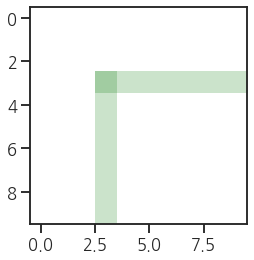

In [58]:
plt.imshow(im_pengkde[:10, :10])

plt.savefig("108_mpl3d3_02.png")

In [59]:
import matplotlib.colors as mcolors

idx_gx, idx_gy, _ =  np.where(im_pengkde[:5, :5] != mcolors.to_rgba("w"))
im_pengkde= im_pengkde[idx_gx[0]+1:-idx_gx[0]-2, idx_gy[0]+1:-idx_gx[0]-2]
print(im_pengkde[:2, :2])
print(im_pengkde.shape)

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]]]
(351, 351, 4)


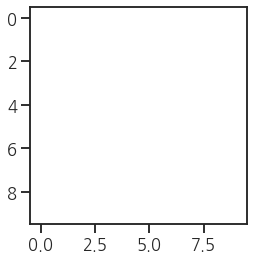

In [60]:
plt.imshow(im_pengkde[:10, :10])

plt.savefig("108_mpl3d3_03.png")

In [61]:
from colorspacious import cspace_converter

im_pengkde_L = np.zeros(im_pengkde.shape[:2])
for i in range(im_pengkde.shape[0]):
    for j in range(im_pengkde.shape[1]):
        RGB = im_pengkde[i, j][:3]
        if sum(RGB - np.array([1, 1, 1])) == 0:
            im_pengkde_L[i, j] = -1   
        else: 
            lab = cspace_converter("sRGB1", "CAM02-UCS")(RGB)
            im_pengkde_L[i, j] = lab[0]

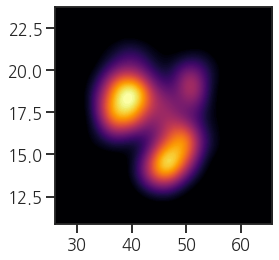

In [62]:
plt.imshow(im_pengkde_L, cmap="inferno",
           extent=[xmin, xmax, ymin, ymax], 
           aspect=(xmax-xmin)/(ymax-ymin))

plt.savefig("108_mpl3d3_04.png")

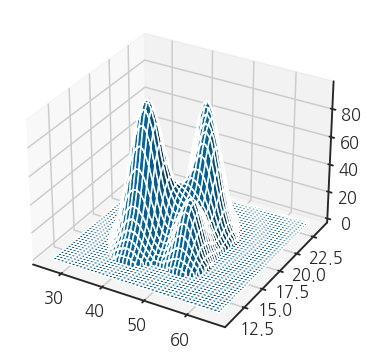

In [63]:
xs = np.linspace(xmin, xmax, im_pengkde.shape[1])
ys = np.linspace(ymin, ymax, im_pengkde.shape[0])
xx, yy = np.meshgrid(xs, ys)

fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True,
                       subplot_kw={"projection":"3d"})
ax.plot_surface(xx, yy, im_pengkde_L)

plt.savefig("108_mpl3d3_05.png")

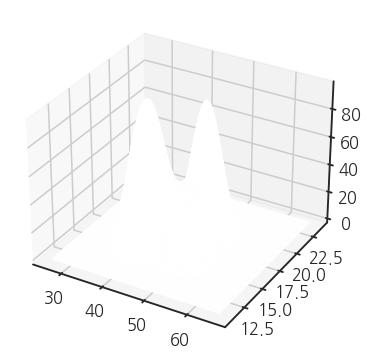

In [64]:
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True,
                       subplot_kw={"projection":"3d"})
ax.plot_surface(xx, yy, im_pengkde_L, rstride=1, cstride=1)
plt.savefig("108_mpl3d3_06.png")

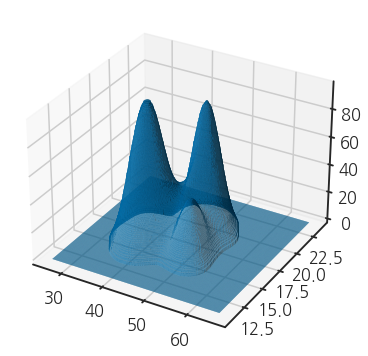

In [68]:
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True,
                       subplot_kw={"projection":"3d"})
ax.plot_surface(xx, yy, im_pengkde_L, rstride=1, cstride=1, lw=0)

plt.savefig("108_mpl3d3_07.png")

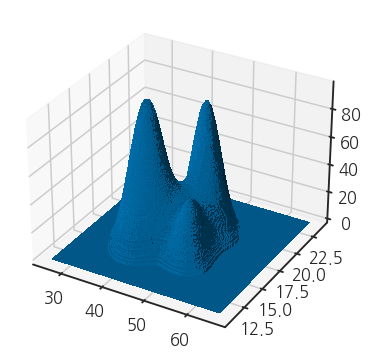

In [99]:
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True,
                       subplot_kw={"projection":"3d"})
ax.plot_surface(xx, yy, im_pengkde_L, rstride=1, cstride=1, lw=0, antialiased=False)

plt.savefig("108_mpl3d3_14.png")

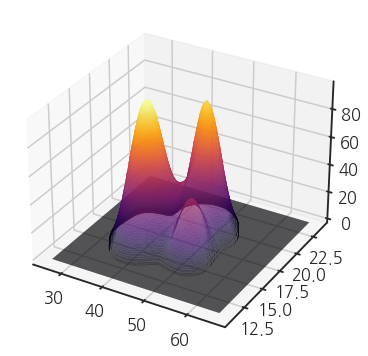

In [71]:
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True,
                       subplot_kw={"projection":"3d"})
ax.plot_surface(xx, yy, im_pengkde_L, rstride=1, cstride=1, lw=0, cmap="inferno")

plt.savefig("108_mpl3d3_08.png")

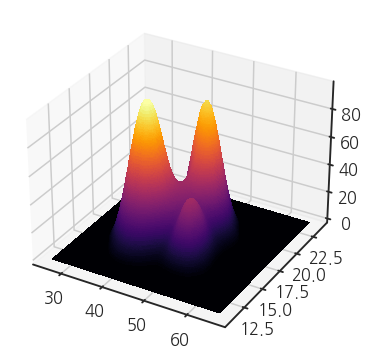

In [74]:
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True,
                       subplot_kw={"projection":"3d"})
ax.plot_surface(xx, yy, im_pengkde_L, rstride=1, cstride=1, lw=0, cmap="inferno", 
                antialiased=False)

plt.savefig("108_mpl3d3_09.png")

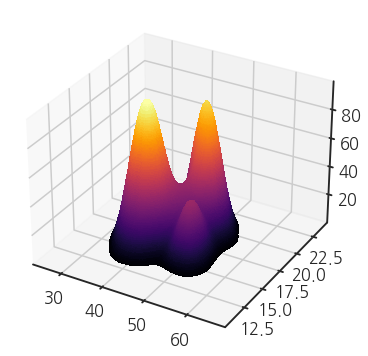

In [78]:
im_pengkde_L_masked = np.ma.masked_array(im_pengkde_L, im_pengkde_L <= 0)

fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True,
                       subplot_kw={"projection":"3d"})
ax.plot_surface(xx, yy, im_pengkde_L_masked, rstride=1, cstride=1, lw=0, 
                cmap="inferno", antialiased=False)

plt.savefig("108_mpl3d3_10.png")

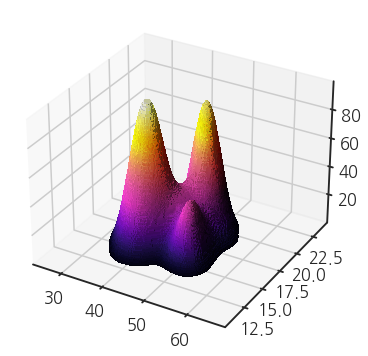

In [101]:
from matplotlib.colors import LightSource

# Light Source object 생성
ls = LightSource(azdeg=-45, altdeg=30)
# shade 생성
rgb = ls.shade(im_pengkde_L, plt.get_cmap("inferno"))

fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True, 
                       subplot_kw={"projection":"3d"})
ax.plot_surface(xx, yy, im_pengkde_L_masked, rstride=1, cstride=1, lw=0, antialiased=False, 
                facecolors=rgb)

plt.savefig("108_mpl3d3_11.png")

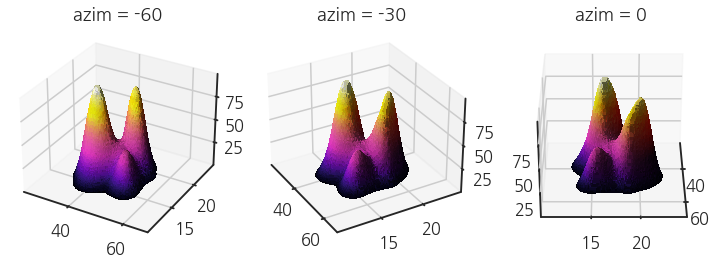

In [87]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 4), constrained_layout=True, 
                       subplot_kw={"projection":"3d"})
elev = 30
azims = [-60, -30, 0]

for ax, azim in zip(axs, azims):
    ax.plot_surface(xx, yy, im_pengkde_L_masked, rstride=2, cstride=2, lw=0, antialiased=False, 
                    facecolors=rgb)
    ax.view_init(elev, azim)
    ax.set_title(f"azim = {azim}")
    
plt.savefig("108_mpl3d3_12.png")

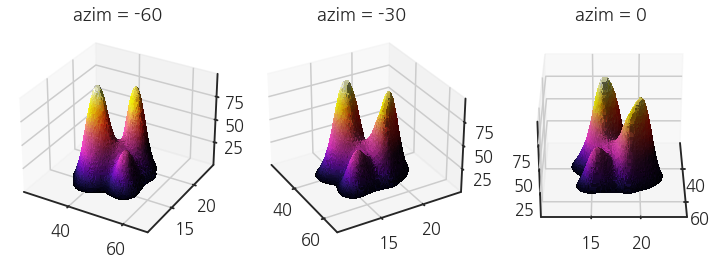

In [94]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 4), constrained_layout=True, 
                       subplot_kw={"projection":"3d"})
elev = 30
azims = [-60, -30, 0]

for ax, azim in zip(axs, azims):
    ls = LightSource(azdeg=azim, altdeg=elev)
    rgb = ls.shade(im_pengkde_L, plt.get_cmap("inferno"), blend_mode='overlay')
    ax.plot_surface(xx, yy, im_pengkde_L_masked, rstride=2, cstride=2, lw=0, antialiased=False, 
                    facecolors=rgb)
    ax.view_init(elev, azim)
    ax.set_title(f"azim = {azim}")
    
plt.savefig("108_mpl3d3_13.png")

MovieWriter ffmpeg unavailable; using Pillow instead.


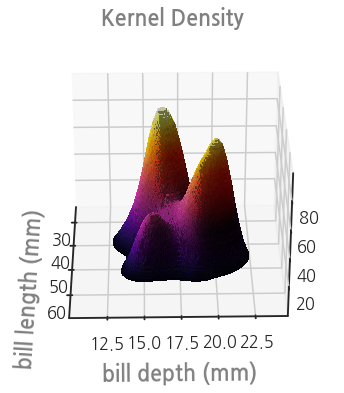

In [95]:
from matplotlib import animation 

fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True, 
                       subplot_kw={"projection":"3d"})

fontlabel = {"fontsize":"large", "color":"gray", "fontweight":"bold"}

def init():
    ls = LightSource(azdeg=-45, altdeg=30)
    rgb = ls.shade(im_pengkde_L, plt.get_cmap("inferno"))
    ax.set_xlabel("bill length (mm)", fontdict=fontlabel, labelpad=16)
    ax.set_ylabel("bill depth (mm)", fontdict=fontlabel, labelpad=16)
    ax.set_title("Kernel Density", fontdict=fontlabel)
    ax.plot_surface(xx, yy, im_pengkde_L_masked, rstride=1, cstride=1, lw=0, antialiased=False, 
                facecolors=rgb)
    return fig,

def animate(i):
    ax.view_init(elev=30, azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)

# Save
anim.save('108_mpl3d3_rot_01.gif', fps=30)

In [ ]:
from matplotlib import animation 

fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True, 
                       subplot_kw={"projection":"3d"})

fontlabel = {"fontsize":"large", "color":"gray", "fontweight":"bold"}

def init():
    ls = LightSource(azdeg=-45, altdeg=30)
    rgb = ls.shade(im_pengkde_L, plt.get_cmap("inferno"))
    ax.set_xlabel("bill length (mm)", fontdict=fontlabel, labelpad=16)
    ax.set_ylabel("bill depth (mm)", fontdict=fontlabel, labelpad=16)
    ax.set_title("Kernel Density", fontdict=fontlabel)
    ax.plot_surface(xx, yy, im_pengkde_L_masked, rstride=1, cstride=1, lw=0, antialiased=False, 
                facecolors=rgb)
    return fig,

def animate(i):
    ax.view_init(elev=30, azim=i)
    ax.get_children()[0].remove()
    ls = LightSource(azdeg=i-45, altdeg=30)
    rgb = ls.shade(im_pengkde_L, plt.get_cmap("inferno"))
    ax.plot_surface(xx, yy, im_pengkde_L_masked, rstride=1, cstride=1, lw=0, antialiased=False, 
                facecolors=rgb)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)

# Save
anim.save('108_mpl3d3_rot_02.gif', fps=30)

MovieWriter ffmpeg unavailable; using Pillow instead.
